In [5]:
import monkdata as m
import dtree as dt
import drawtree_qt5 as draw

Assignment1

In [6]:
dt.entropy(m.monk1)

1.0

In [7]:
dt.entropy(m.monk2)

0.957117428264771

In [8]:
dt.entropy(m.monk3)

0.9998061328047111

Assignment2

In [9]:
print(dt.averageGain(m.monk1,m.attributes[0]))
print(dt.averageGain(m.monk1,m.attributes[1]))
print(dt.averageGain(m.monk1,m.attributes[2]))
print(dt.averageGain(m.monk1,m.attributes[3]))
print(dt.averageGain(m.monk1,m.attributes[4]))
print(dt.averageGain(m.monk1,m.attributes[5]))

0.07527255560831925
0.005838429962909286
0.00470756661729721
0.02631169650768228
0.28703074971578435
0.0007578557158638421


In [10]:
print(dt.averageGain(m.monk2,m.attributes[0]))
print(dt.averageGain(m.monk2,m.attributes[1]))
print(dt.averageGain(m.monk2,m.attributes[2]))
print(dt.averageGain(m.monk2,m.attributes[3]))
print(dt.averageGain(m.monk2,m.attributes[4]))
print(dt.averageGain(m.monk2,m.attributes[5]))

0.0037561773775118823
0.0024584986660830532
0.0010561477158920196
0.015664247292643818
0.01727717693791797
0.006247622236881467


In [11]:
print(dt.averageGain(m.monk3,m.attributes[0]))
print(dt.averageGain(m.monk3,m.attributes[1]))
print(dt.averageGain(m.monk3,m.attributes[2]))
print(dt.averageGain(m.monk3,m.attributes[3]))
print(dt.averageGain(m.monk3,m.attributes[4]))
print(dt.averageGain(m.monk3,m.attributes[5]))

0.007120868396071844
0.29373617350838865
0.0008311140445336207
0.002891817288654397
0.25591172461972755
0.007077026074097326


Assignment3

In [12]:
t1= dt.buildTree(m.monk1,m.attributes)
print(1-dt.check(t1,m.monk1))
print(1-dt.check(t1,m.monk1test))

0.0
0.17129629629629628


In [13]:
import drawtree_qt5 as draw
#draw.drawTree(t1)

In [14]:
t2= dt.buildTree(m.monk2,m.attributes)
print(1-dt.check(t2,m.monk2))
print(1-dt.check(t2,m.monk2test))

0.0
0.30787037037037035


In [15]:
t3= dt.buildTree(m.monk3,m.attributes)
print(1-dt.check(t3,m.monk3))
print(1-dt.check(t3,m.monk3test))

0.0
0.05555555555555558


Assignment4

In [16]:
import monkdata as m
import dtree as dt
import drawtree_qt5 as draw
import random
import pandas as pd
import numpy as np
def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]

besttree={}   ## save best pruned tree for each f
none_pruned_tree={}
errors={}  ##save errors for each f
test_errors={}
train_errors={}

for f in [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:  ## fraction
    errors[f]=[]    ##contain errors for a certain f over 500 times
    test_errors[f]=[]
    train_errors[f]=[]
    for i in range(500):   ## run 500 times to get statistics 
        
        monk1train, monk1val= partition(m.monk1,f)  # split
        tree= dt.buildTree(monk1train,m.attributes)        
        bestaccuracy= dt.check(tree,monk1val) ## accuracy on validation without pruned
        flag=1   ## to decide whether should we continue to prune
        
        while(flag==1):
            flag=0
            pruned_trees=dt.allPruned(tree)
            for t1_pruned in pruned_trees:
                if dt.check(t1_pruned,monk1val) >= bestaccuracy:
                    bestaccuracy=dt.check(t1_pruned,monk1val)
                    flag=1
                    tree=t1_pruned    
        errors[f].append(1-bestaccuracy)
        besttree[f]=tree
        test_errors[f].append(1-dt.check(tree,m.monk1test))
        train_errors[f].append(1-dt.check(tree,monk1train))
errors_pd=pd.DataFrame(errors)
errors_pd.describe().ix[[1,2,3,7]]

/Users/yyf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,0.3,0.4,0.5,0.6,0.7,0.8
mean,0.227816,0.199867,0.169774,0.150640,0.129842,0.120880
std,0.049675,0.052664,0.058376,0.061357,0.059847,0.067874
min,0.080460,0.053333,0.032258,0.000000,0.000000,0.000000
max,0.379310,0.360000,0.403226,0.360000,0.342105,0.400000


In [17]:
train_errors_pd=pd.DataFrame(train_errors)
train_errors_pd.describe().ix[[1,2,3,7]]

/Users/yyf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,0.3,0.4,0.5,0.6,0.7,0.8
mean,0.126541,0.126245,0.117742,0.130973,0.150372,0.179293
std,0.079857,0.076914,0.073736,0.067208,0.062922,0.052558
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.060606
max,0.351351,0.326531,0.322581,0.324324,0.325581,0.303030


In [18]:
## we choose f =0.8 as the best f

In [19]:
test_errors_pd=pd.DataFrame(test_errors)
test_errors_pd.describe().ix[[1,2,3,7]]

/Users/yyf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,0.3,0.4,0.5,0.6,0.7,0.8
mean,0.234176,0.217000,0.199833,0.196296,0.200111,0.221097
std,0.038375,0.038003,0.041756,0.042170,0.042740,0.036031
min,0.083333,0.111111,0.083333,0.055556,0.055556,0.111111
max,0.375000,0.305556,0.326389,0.289352,0.287037,0.305556


/Users/yyf/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:641: UserWarning: Unrecognized location "error". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


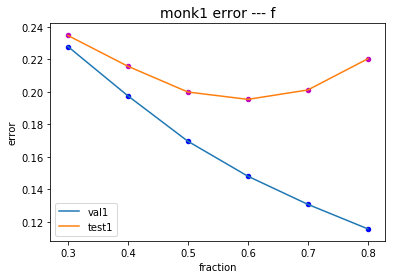

In [20]:





import matplotlib.pyplot as plt

plt.plot([0.3, 0.4, 0.5, 0.6, 0.7, 0.8], [0.227920,0.197573,0.169613,0.148100,0.130763,0.115680], label='val1')
plt.scatter([0.3, 0.4, 0.5, 0.6, 0.7, 0.8], [0.227920,0.197573,0.169613,0.148100,0.130763,0.115680], s=20, c="b", marker='o')

plt.plot([0.3, 0.4, 0.5, 0.6, 0.7, 0.8], [0.234736,0.215775,0.199919,0.195394,0.201178,0.220368], label='test1')
plt.scatter([0.3, 0.4, 0.5, 0.6, 0.7, 0.8], [0.234736,0.215775,0.199919,0.195394,0.201178,0.220368], s=20, c="m", marker='o')
plt.title("monk1 error --- f", fontsize=14)
plt.xlabel('fraction')
plt.ylabel('error')
plt.legend(loc='error')
plt.show()

In [21]:
import monkdata as m
import dtree as dt
import monkdata as m
import dtree as dt
import drawtree_qt5 as draw
import random
import pandas as pd
import numpy as np
def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]

besttree={}   ## save best pruned tree for each f
none_pruned_tree={}
errors={}  ##save errors for each f
test_errors={}
train_errors={}

for f in [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:  ## fraction
    errors[f]=[]    ##contain errors for a certain f over 500 times
    test_errors[f]=[]
    train_errors[f]=[]
    for i in range(500):   ## run 500 times to get statistics 
        
        monk3train, monk3val= partition(m.monk3,f)  # split
        tree= dt.buildTree(monk3train,m.attributes)        
        bestaccuracy= dt.check(tree,monk3val) ## accuracy on validation without pruned
        flag=1   ## to decide whether should we continue to prune
        
        while(flag==1):
            flag=0
            pruned_trees=dt.allPruned(tree)
            for t1_pruned in pruned_trees:
                if dt.check(t1_pruned,monk3val) >= bestaccuracy:
                    bestaccuracy=dt.check(t1_pruned,monk3val)
                    flag=1
                    tree=t1_pruned    
        errors[f].append(1-bestaccuracy)
        besttree[f]=tree
        test_errors[f].append(1-dt.check(tree,m.monk3test))
        train_errors[f].append(1-dt.check(tree,monk3train))
errors_pd=pd.DataFrame(errors)
errors_pd.describe().ix[[1,2,3,7]]

/Users/yyf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


,0.3,0.4,0.5,0.6,0.7,0.8
mean,0.123395,0.096270,0.081443,0.073143,0.064649,0.058000
std,0.053549,0.038944,0.034915,0.035495,0.039672,0.042516
min,0.034884,0.013514,0.016393,0.000000,0.000000,0.000000
max,0.302326,0.256757,0.196721,0.204082,0.216216,0.280000


In [22]:
test_errors_pd=pd.DataFrame(test_errors)
test_errors_pd.describe().ix[[1,2,3,7]]

/Users/yyf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,0.3,0.4,0.5,0.6,0.7,0.8
mean,0.086157,0.056773,0.042227,0.034176,0.032204,0.037935
std,0.054435,0.042814,0.033428,0.029279,0.027871,0.032020
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.277778,0.222222,0.194444,0.138889,0.175926,0.212963


/Users/yyf/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:641: UserWarning: Unrecognized location "error". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


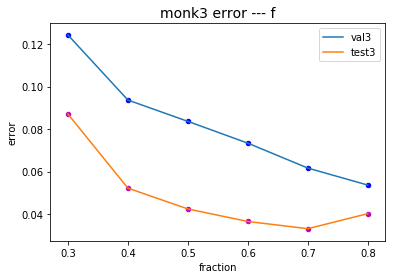

In [23]:
import matplotlib.pyplot as plt

plt.plot([0.3, 0.4, 0.5, 0.6, 0.7, 0.8], [0.124279,0.093676,0.083639,0.073388,0.061676,0.053680], label='val3')
plt.scatter([0.3, 0.4, 0.5, 0.6, 0.7, 0.8], [0.124279,0.093676,0.083639,0.073388,0.061676,0.053680], s=20, c="b", marker='o')

plt.plot([0.3, 0.4, 0.5, 0.6, 0.7, 0.8], [0.087093,0.052250,0.042458,0.036565,0.033167,0.040250], label='test3')
plt.scatter([0.3, 0.4, 0.5, 0.6, 0.7, 0.8], [0.087093,0.052250,0.042458,0.036565,0.033167,0.040250], s=20, c="m", marker='o')
plt.title("monk3 error --- f", fontsize=14)
plt.xlabel('fraction')
plt.ylabel('error')
plt.legend(loc='error')
plt.show()